# DATA103 Python Refresher Notebook by Juan Carlos Rodriguez
---

DLSU Andrew L. Tan Data Science Institute

**Tasks Done**
1.   All Graphs were Changed under the Color Tone "#FABC3F", "#E85C0D", "#C7253E", "#821131" which was specific for Group 6
2.   For Quantitative Data, the Dataset used is from Kaggle and uploaded to Github for easy access found in this link: ("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")
3. For Qualitatitive Data, the Dataset used is an input from the author manually
4. *The Data set used for Preprocessing is the same used for the Regression, except for the Qualitative Part of Preprocessing*
5. Random States/Seed Numbers of all Codes are set to 91 and the number of observations are 300



# **1.0 Classification using Support Vector Machine**

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


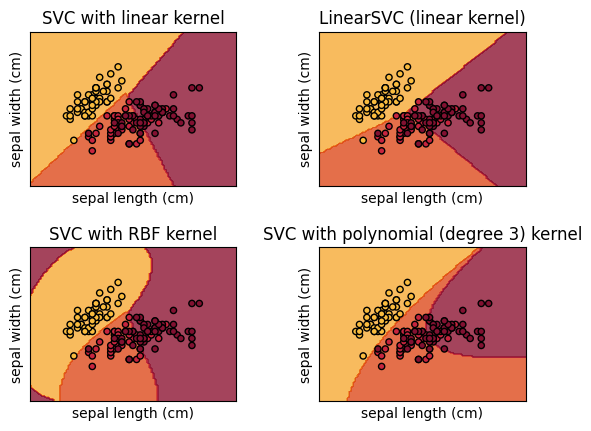

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# Define the custom colors
colors = ["#FABC3F", "#E85C0D", "#C7253E", "#821131"]
cmap = mcolors.ListedColormap(colors)

# Define the boundary color map
boundary_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

# Create an instance of SVM and fit our data
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# Title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=boundary_cmap,  # Use the custom boundary colormap
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    scatter = ax.scatter(X0, X1, c=y, cmap=cmap, s=20, edgecolors="k")  # Use the custom scatter colormap
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


In [2]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [3]:
clf.predict([[2., 2.]])

array([1])

In [4]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [5]:
# get indices of support vectors
clf.support_

array([0, 1], dtype=int32)

In [6]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

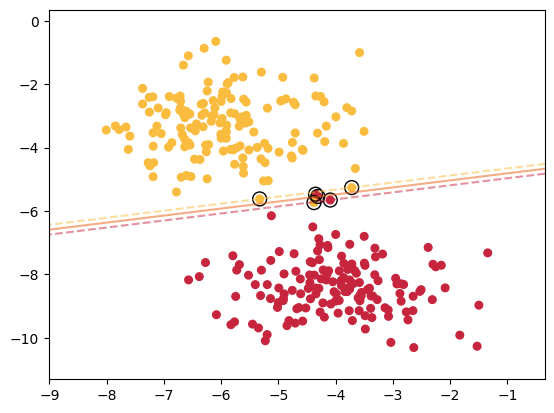

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# Create 40 separable points
X, y = make_blobs(n_samples=300, centers=2, random_state=91)

# Define the custom colors
colors = ["#FABC3F", "#C7253E"]  # Only two colors needed for binary classification
cmap = mcolors.ListedColormap(colors)

# Define the boundary color map
boundary_colors = ["#FABC3F", "#E85C0D", "#C7253E", "#821131"]
boundary_cmap = mcolors.LinearSegmentedColormap.from_list("boundary_cmap", boundary_colors)

# Fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

# Scatter plot with custom colors
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap)

# Plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors=boundary_colors,  # Use custom boundary colors
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

# Plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.show()

In [8]:
import numpy as np

from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

# Add non-informative features
rng = np.random.RandomState(91)
X = np.hstack((X, 2 * rng.random((X.shape[0], 36))))

In [9]:
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator

clf = Pipeline(
    [
        ("anova", SelectPercentile(f_classif)),
        ("scaler", StandardScaler()),
        ("svc", SVC(gamma="auto")),
    ]
)

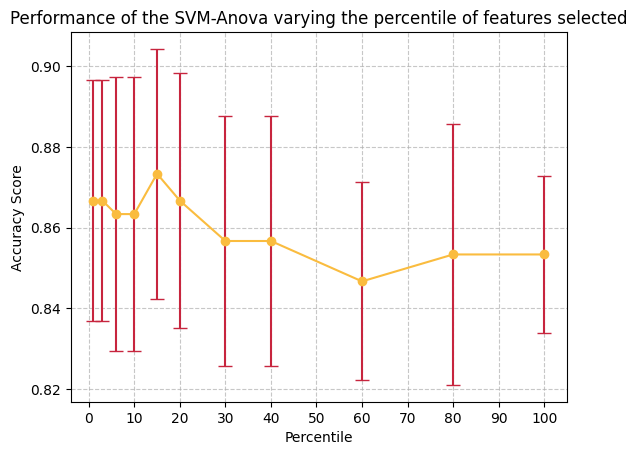

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Defining the custom colors
colors = ["#FABC3F", "#C7253E", "#E85C0D", "#821131"]

# Create a color map from the list of colors
color_map = plt.get_cmap("tab10")

# Generate sample data
X, y = make_classification(n_samples=300, n_features=20, random_state=91)

# Create a pipeline with feature selection and SVM
clf = Pipeline([
    ("anova", SelectPercentile(f_classif)),
    ("svm", SVC(kernel="linear"))
])

score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

# Plot the results
plt.errorbar(percentiles, score_means, yerr=score_stds, fmt='-o', color=colors[0], ecolor=colors[1], capsize=5)
plt.title("Performance of the SVM-Anova varying the percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#**1.1 Multi-Class Classification**


In [11]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

SVC(decision_function_shape='ovo')

In [12]:
dec = clf.decision_function([[1]])
dec.shape[1] # 6 classes: 4*3/2 = 6

6

In [13]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

In [14]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [15]:
dec = lin_clf.decision_function([[1]])
dec.shape[1]

4

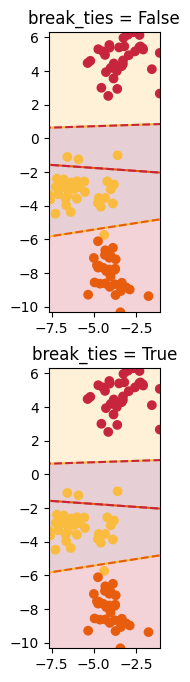

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.colors as mcolors

# Generate data
X, y = make_blobs(random_state=91)

# Define custom colors
colors = ["#FABC3F", "#E85C0D", "#C7253E", "#821131"]
boundary_colors = [colors[0], colors[1], colors[2], colors[3]]

# Create a color map using the custom colors
cmap = mcolors.ListedColormap(colors[:len(np.unique(y))])

# Set up the plot
fig, sub = plt.subplots(2, 1, figsize=(5, 8))
titles = ("break_ties = False", "break_ties = True")

for break_ties, title, ax in zip((False, True), titles, sub.flatten()):
    svm = SVC(
        kernel="linear", C=1, break_ties=break_ties, decision_function_shape="ovr"
    ).fit(X, y)

    xlim = [X[:, 0].min(), X[:, 0].max()]
    ylim = [X[:, 1].min(), X[:, 1].max()]

    xs = np.linspace(xlim[0], xlim[1], 1000)
    ys = np.linspace(ylim[0], ylim[1], 1000)
    xx, yy = np.meshgrid(xs, ys)

    pred = svm.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary
    ax.imshow(
        -pred.reshape(xx.shape),
        cmap=mcolors.ListedColormap(boundary_colors),
        alpha=0.2,
        extent=(xlim[0], xlim[1], ylim[1], ylim[0]),
    )

    # Scatter plot with custom colors
    points = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

    classes = [(0, 1), (0, 2), (1, 2)]
    line = np.linspace(X[:, 1].min() - 5, X[:, 1].max() + 5)
    for coef, intercept, col in zip(svm.coef_, svm.intercept_, classes):
        line2 = -(line * coef[1] + intercept) / coef[0]
        ax.plot(line2, line, "-", c=boundary_colors[col[0]])
        ax.plot(line2, line, "--", c=boundary_colors[col[1]])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(title)
    ax.set_aspect("equal")

plt.show()

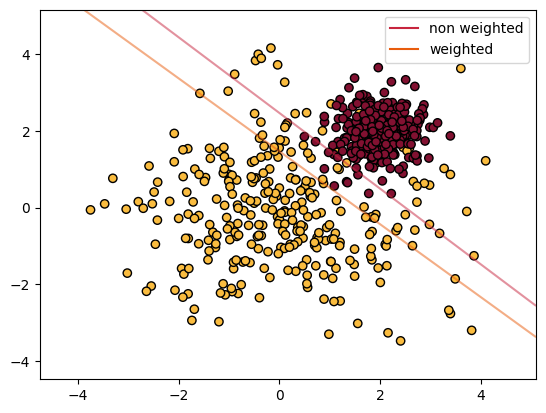

In [17]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# Define custom colors
colors = ["#FABC3F", "#821131", "#C7253E", "#E85C0D"]
scatter_colors = [colors[0], colors[1]]  # Colors for scatter points (one for each class)
boundary_colors = [colors[2], colors[3]]  # Colors for decision boundaries

# Create two clusters of random points
# 300 Sample Size Specific For Group 6
n_samples_1 = 300
n_samples_2 = 300
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=91,
    shuffle=False,
)

# Fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# Fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# Create colormap for scatter plot
scatter_cmap = mcolors.ListedColormap(scatter_colors)

# Plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=scatter_cmap, edgecolors="k")

# Plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors=boundary_colors[0],  # Use custom color for non-weighted decision boundary
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# Plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors=boundary_colors[1],  # Use custom color for weighted decision boundary
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# Add legend with custom colors
plt.legend(
    [
        mlines.Line2D([], [], color=boundary_colors[0], label="non weighted"),
        mlines.Line2D([], [], color=boundary_colors[1], label="weighted"),
    ],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()


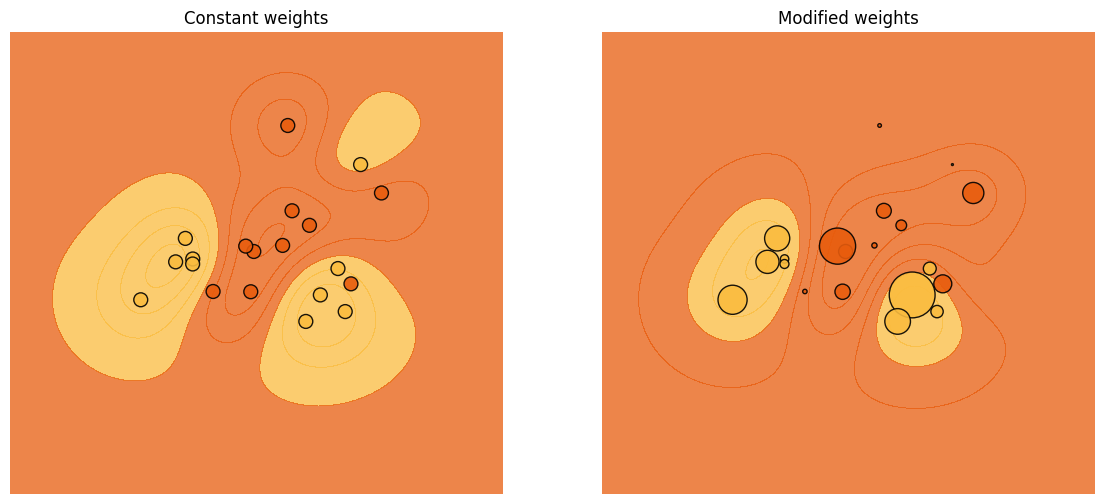

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
import matplotlib.colors as mcolors

def plot_decision_function(classifier, sample_weight, axis, title):
    # Define custom colors
    colors = ["#FABC3F", "#E85C0D", "#C7253E", "#821131"]
    cmap = mcolors.ListedColormap(colors[:2])  # Use the first two colors for binary classification

    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    # Compute decision function
    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision function
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=cmap)
    scatter = axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=cmap,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)

# Generate data
np.random.seed(91)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# Larger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

# Fit the models
clf_no_weights = svm.SVC(gamma=1)
clf_no_weights.fit(X, y)

clf_weights = svm.SVC(gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

#**1.2 Classification on Regression**

In [19]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)

SVR()

In [20]:
regr.predict([[1, 1]])

array([1.5])

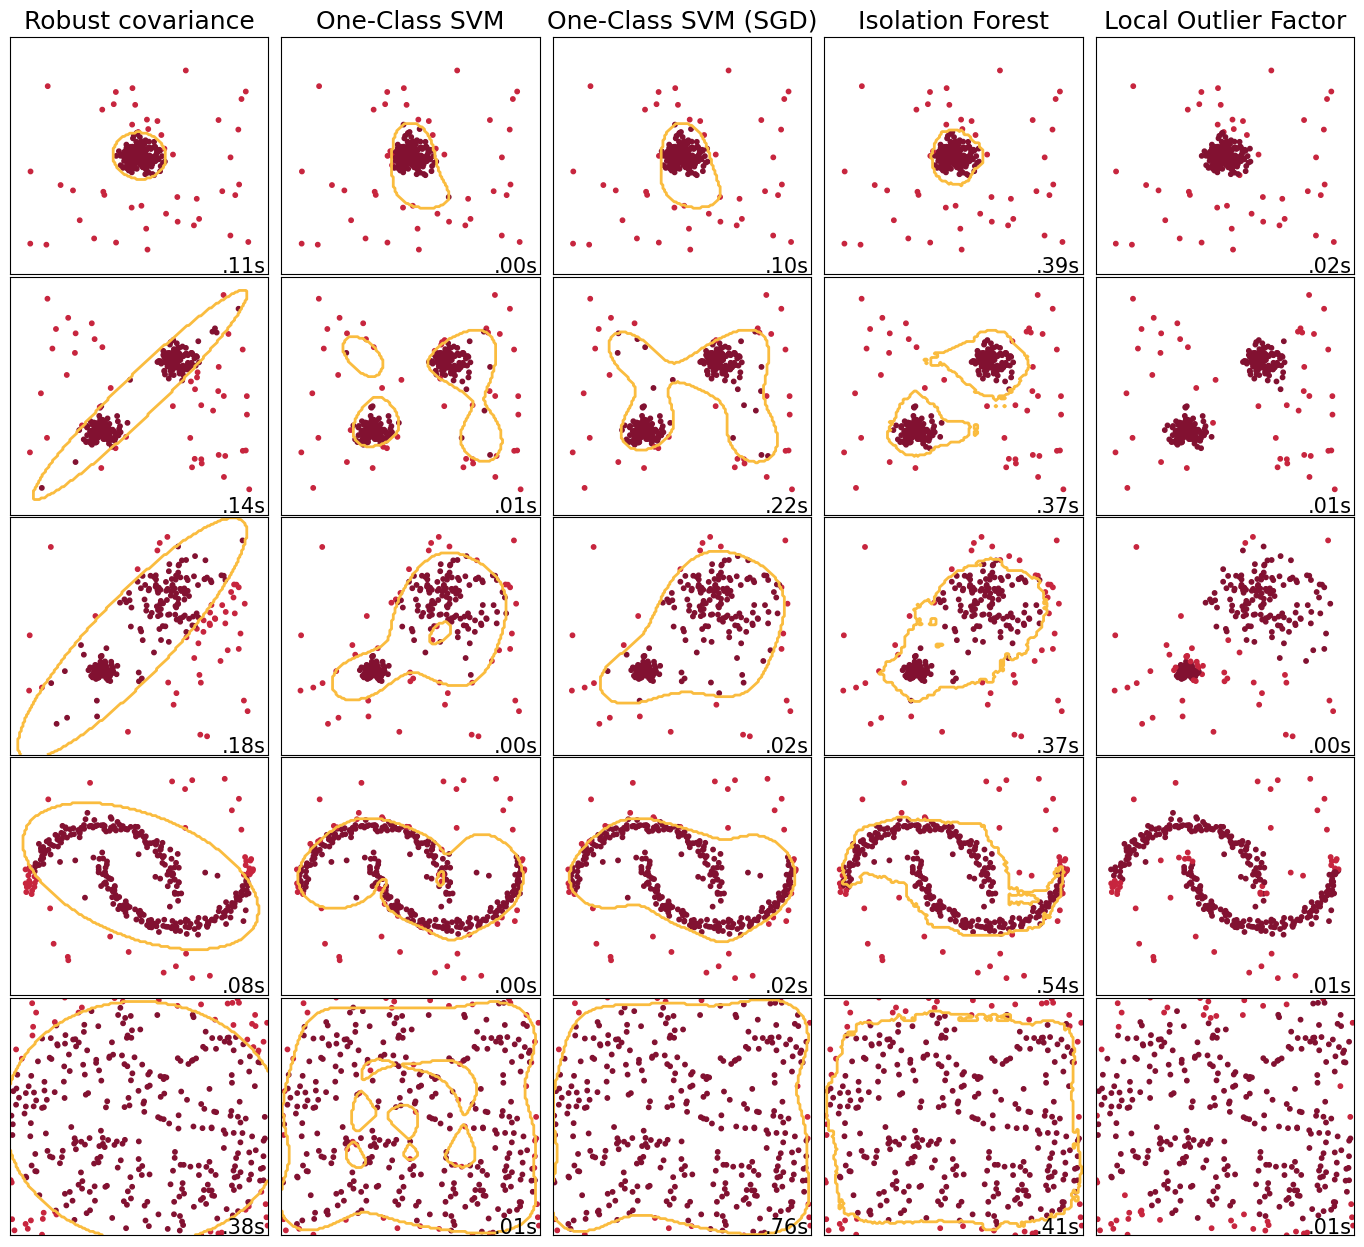

In [21]:
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs, make_moons
from sklearn.ensemble import IsolationForest
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# Define outlier/anomaly detection methods to be compared.
anomaly_algorithms = [
    (
        "Robust covariance",
        EllipticEnvelope(contamination=outliers_fraction, random_state=91),
    ),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=91, n_components=150),
            SGDOneClassSVM(
                nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=91,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
        IsolationForest(contamination=outliers_fraction, random_state=91),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
    ),
]

# Define datasets
blobs_params = dict(random_state=91, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=91)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(91).rand(n_samples, 2) - 0.5),
]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 12.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
rng = np.random.RandomState(91)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="#FABC3F")  # Custom contour color

        # Custom scatter colors
        colors = np.array(["#C7253E", "#821131"])  # Custom scatter colors for inliers and outliers
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()


In [22]:
import numpy as np

from sklearn import svm

# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

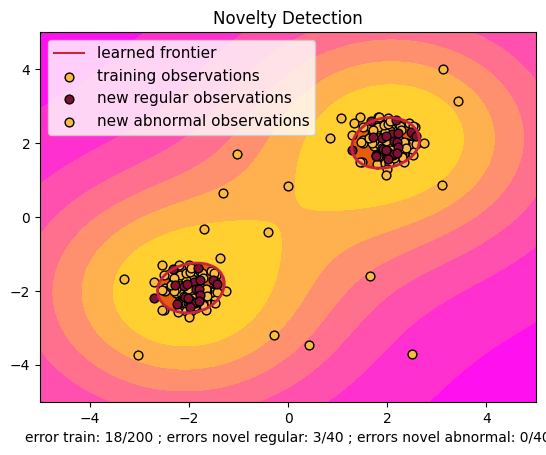

In [23]:
import matplotlib.font_manager
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

_, ax = plt.subplots()

# Generate grid for the boundary display
xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))
X = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)

# Use your decision boundary colors
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    cmap="spring",
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contourf",
    ax=ax,
    levels=[0, 10000],
    colors="#E85C0D",  # Custom color
)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contour",
    ax=ax,
    levels=[0],
    colors="#C7253E",  # Custom color
    linewidths=2,
)

s = 40
b1 = ax.scatter(X_train[:, 0], X_train[:, 1], c="#FABC3F", s=s, edgecolors="k")
b2 = ax.scatter(X_test[:, 0], X_test[:, 1], c="#821131", s=s, edgecolors="k")
c = ax.scatter(X_outliers[:, 0], X_outliers[:, 1], c="#FABC3F", s=s, edgecolors="k")

plt.legend(
    [mlines.Line2D([], [], color="#C7253E"), b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
ax.set(
    xlabel=(f"error train: {n_error_train}/200 ; errors novel regular: {n_error_test}/40 ; errors novel abnormal: {n_error_outliers}/40"),
    title="Novelty Detection",
    xlim=(-5, 5),
    ylim=(-5, 5),
)
plt.show()


In [24]:
import numpy as np

# for consistent results
np.random.seed(91)

n_samples = 300
n_outliers = 25
n_features = 2

# generate Gaussian data of shape (125, 2)
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.0
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.0
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

In [25]:
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print(
    "Estimated covariance matrix:\nMCD (Robust):\n{}\nMLE:\n{}".format(
        robust_cov.covariance_, emp_cov.covariance_
    )
)

Estimated covariance matrix:
MCD (Robust):
[[ 3.16075401 -0.17557368]
 [-0.17557368  0.96347068]]
MLE:
[[ 3.6153363  -0.02244014]
 [-0.02244014  5.03267678]]


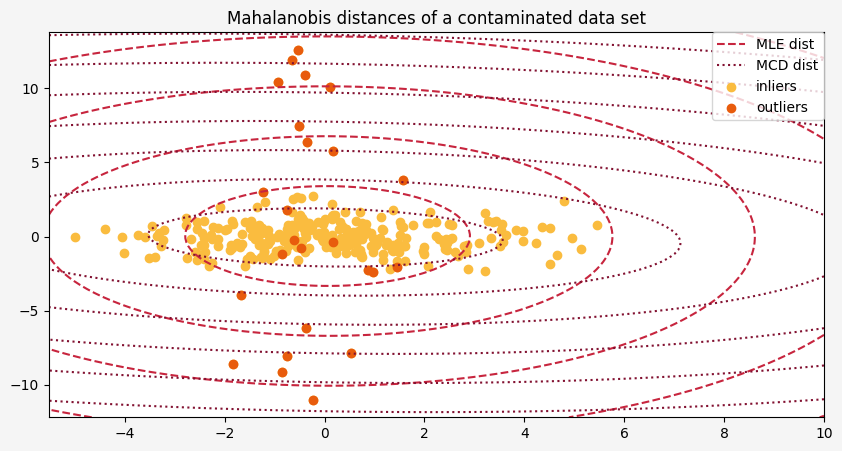

In [26]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Set custom background colors
fig.patch.set_facecolor('#F5F5F5')  # Figure background color
ax.set_facecolor('#FFFFFF')  # Axes background color

# Plot data set
inlier_plot = ax.scatter(X[:, 0], X[:, 1], color="#FABC3F", label="inliers")  # Custom color for inliers
outlier_plot = ax.scatter(
    X[:, 0][-n_outliers:], X[:, 1][-n_outliers:], color="#E85C0D", label="outliers"  # Custom color for outliers
)
ax.set_xlim(ax.get_xlim()[0], 10.0)
ax.set_title("Mahalanobis distances of a contaminated data set")

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(
    np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
    np.linspace(plt.ylim()[0], plt.ylim()[1], 100),
)
zz = np.c_[xx.ravel(), yy.ravel()]

# Calculate the MLE based Mahalanobis distances of the meshgrid
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = plt.contour(
    xx, yy, np.sqrt(mahal_emp_cov), colors="#C7253E", linestyles="dashed"  # Custom color for MLE dist
)

# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(
    xx, yy, np.sqrt(mahal_robust_cov), colors="#821131", linestyles="dotted"  # Custom color for MCD dist
)

# Add legend
ax.legend(
    [
        mlines.Line2D([], [], color="#C7253E", linestyle="dashed"),  # Custom color for MLE dist
        mlines.Line2D([], [], color="#821131", linestyle="dotted"),  # Custom color for MCD dist
        inlier_plot,
        outlier_plot,
    ],
    ["MLE dist", "MCD dist", "inliers", "outliers"],
    loc="upper right",
    borderaxespad=0,
)

plt.show()


In [27]:
lof = LocalOutlierFactor(novelty=True)
lof.fit(X_train)

LocalOutlierFactor(novelty=True)

In [28]:
import numpy as np

from sklearn.model_selection import train_test_split

n_samples, n_outliers = 300, 40
rng = np.random.RandomState(91)
covariance = np.array([[0.5, -0.1], [0.7, 0.4]])
cluster_1 = 0.4 * rng.randn(n_samples, 2) @ covariance + np.array([2, 2])  # general
cluster_2 = 0.3 * rng.randn(n_samples, 2) + np.array([-2, -2])  # spherical
outliers = rng.uniform(low=-4, high=4, size=(n_outliers, 2))

X = np.concatenate([cluster_1, cluster_2, outliers])
y = np.concatenate(
    [np.ones((2 * n_samples), dtype=int), -np.ones((n_outliers), dtype=int)]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=91)

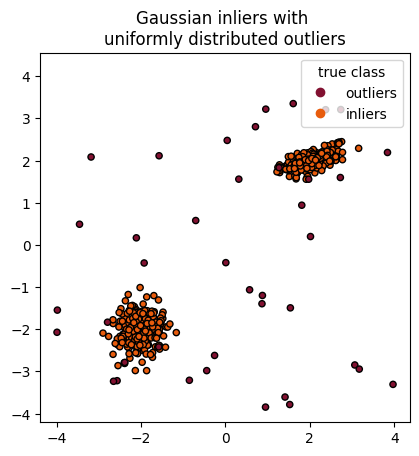

In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define custom colors
colors = ['#821131', '#E85C0D']  # Colors for inliers and outliers

# Create a colormap from the custom colors
cmap = mcolors.ListedColormap(colors)

# Create a scatter plot with custom colors
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    s=20,
    edgecolor="k",
    cmap=cmap  # Use custom colors for the colormap
)

# Add legend
handles, labels = scatter.legend_elements()
plt.axis("square")
plt.legend(
    handles,
    ["outliers", "inliers"],
    title="true class",
    loc='upper right'  # Position the legend in the upper right corner
)
plt.title("Gaussian inliers with \nuniformly distributed outliers")

# Show the plot
plt.show()


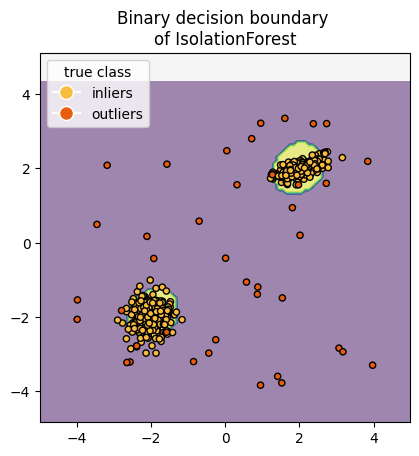

In [30]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.inspection import DecisionBoundaryDisplay

# Define custom colors
inlier_color = '#FABC3F'  # Color for inliers
outlier_color = '#E85C0D'  # Color for outliers

# Create DecisionBoundaryDisplay object
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.5,
)

# Scatter plot with custom colors
scatter = disp.ax_.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    s=20,
    edgecolor="k",
    cmap=mcolors.ListedColormap([outlier_color, inlier_color])  # Custom colormap
)

# Set the background color of the plot and figure
disp.ax_.set_facecolor('#f5f5f5')  # Background color of the plot area
disp.ax_.figure.patch.set_facecolor('#ffffff')  # Background color of the figure

# Add the title and legend
disp.ax_.set_title("Binary decision boundary \nof IsolationForest")

# Create legend manually to ensure colors are correct
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=inlier_color, markersize=10, label='inliers'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=outlier_color, markersize=10, label='outliers')
]
disp.ax_.legend(handles=handles, title="true class")

plt.axis("square")
plt.show()


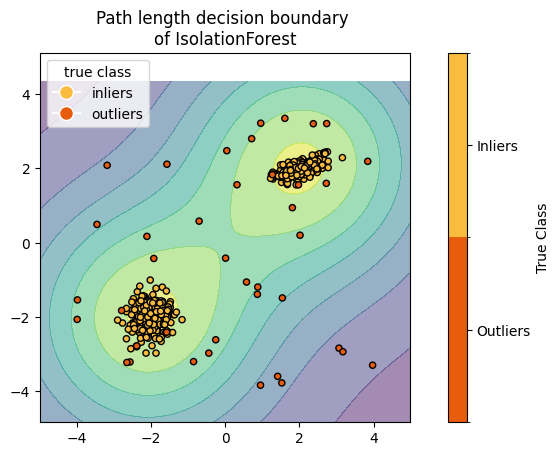

In [31]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.inspection import DecisionBoundaryDisplay

# Define custom colors
inlier_color = '#FABC3F'  # Color for inliers
outlier_color = '#E85C0D'  # Color for outliers

# Create DecisionBoundaryDisplay object
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    alpha=0.5,
)

# Ensure that the background color is explicitly set
disp.ax_.set_facecolor('#ffffff')  # Background color of the plot area
disp.ax_.figure.patch.set_facecolor('#ffffff')  # Background color of the figure

# Scatter plot with custom colors
scatter = disp.ax_.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    s=20,
    edgecolor="k",
    cmap=mcolors.ListedColormap([outlier_color, inlier_color]),  # Custom colormap
    norm=mcolors.BoundaryNorm(boundaries=[-0.5, 0.5, 1.5], ncolors=2)  # Custom norm
)

# Add the title
disp.ax_.set_title("Path length decision boundary \nof IsolationForest")

# Manually create legend to ensure correct colors
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=inlier_color, markersize=10, label='inliers'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=outlier_color, markersize=10, label='outliers')
]
disp.ax_.legend(handles=handles, title="true class")

# Ensure the colorbar matches the custom colormap
colorbar = plt.colorbar(mappable=scatter, ax=disp.ax_, orientation='vertical')
colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Outliers', 'Inliers'])
colorbar.set_label('True Class')

plt.axis("square")
plt.show()


In [32]:
import numpy as np

# for consistent results
np.random.seed(91)

n_samples = 300
n_outliers = 25
n_features = 2

# generate Gaussian data of shape (125, 2)
gen_cov = np.eye(n_features)
gen_cov[0, 0] = 2.0
X = np.dot(np.random.randn(n_samples, n_features), gen_cov)
# add some outliers
outliers_cov = np.eye(n_features)
outliers_cov[np.arange(1, n_features), np.arange(1, n_features)] = 7.0
X[-n_outliers:] = np.dot(np.random.randn(n_outliers, n_features), outliers_cov)

In [33]:
import matplotlib.pyplot as plt

from sklearn.covariance import EmpiricalCovariance, MinCovDet

# fit a MCD robust estimator to data
robust_cov = MinCovDet().fit(X)
# fit a MLE estimator to data
emp_cov = EmpiricalCovariance().fit(X)
print(
    "Estimated covariance matrix:\nMCD (Robust):\n{}\nMLE:\n{}".format(
        robust_cov.covariance_, emp_cov.covariance_
    )
)

Estimated covariance matrix:
MCD (Robust):
[[ 3.16075401 -0.17557368]
 [-0.17557368  0.96347068]]
MLE:
[[ 3.6153363  -0.02244014]
 [-0.02244014  5.03267678]]


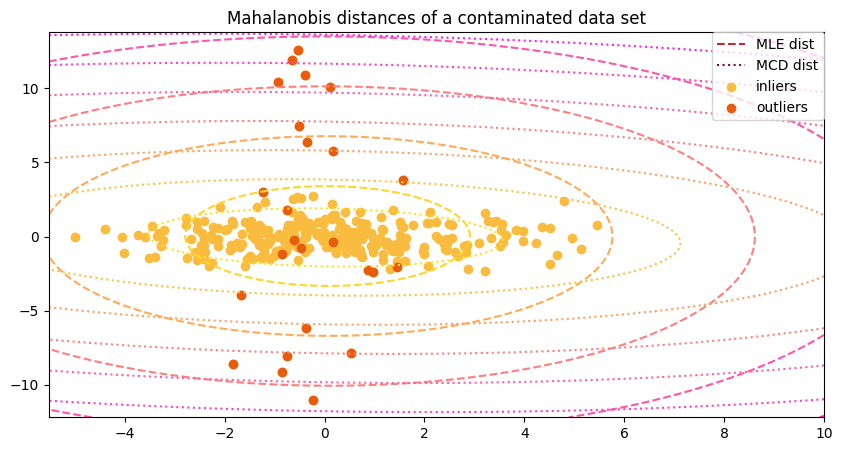

In [34]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

# Define custom colors
inlier_color = '#FABC3F'  # Color for inliers
outlier_color = '#E85C0D'  # Color for outliers
emp_cov_color = '#C7253E'  # Color for MLE dist contour
robust_cov_color = '#821131'  # Color for MCD dist contour

fig, ax = plt.subplots(figsize=(10, 5))

# Plot data set
inlier_plot = ax.scatter(X[:, 0], X[:, 1], color=inlier_color, label="inliers")
outlier_plot = ax.scatter(
    X[:, 0][-n_outliers:], X[:, 1][-n_outliers:], color=outlier_color, label="outliers"
)

ax.set_xlim(ax.get_xlim()[0], 10.0)
ax.set_title("Mahalanobis distances of a contaminated data set")

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(
    np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
    np.linspace(plt.ylim()[0], plt.ylim()[1], 100),
)
zz = np.c_[xx.ravel(), yy.ravel()]

# Calculate the MLE based Mahalanobis distances of the meshgrid
mahal_emp_cov = emp_cov.mahalanobis(zz)
mahal_emp_cov = mahal_emp_cov.reshape(xx.shape)
emp_cov_contour = plt.contour(
    xx, yy, np.sqrt(mahal_emp_cov), cmap=plt.cm.spring_r, linestyles="dashed"
)

# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = robust_cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(
    xx, yy, np.sqrt(mahal_robust_cov), cmap=plt.cm.spring_r, linestyles="dotted"
)

# Add legend
ax.legend(
    [
        mlines.Line2D([], [], color=emp_cov_color, linestyle="dashed"),
        mlines.Line2D([], [], color=robust_cov_color, linestyle="dotted"),
        inlier_plot,
        outlier_plot,
    ],
    ["MLE dist", "MCD dist", "inliers", "outliers"],
    loc="upper right",
    borderaxespad=0,
)

plt.show()


In [35]:
import numpy as np

np.random.seed(91)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [36]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

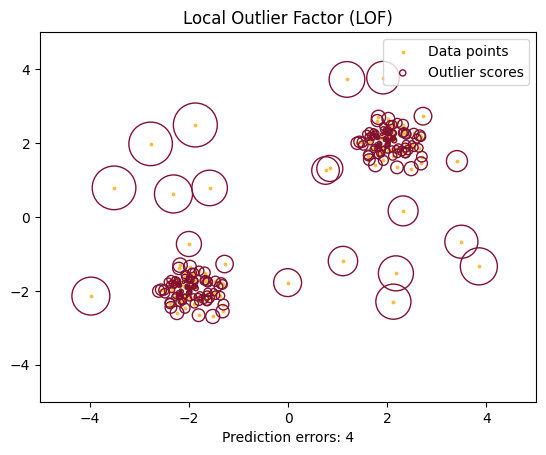

In [37]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

# Define custom colors
data_color = '#FABC3F'  # Color for data points
outlier_edge_color = '#821131'  # Color for outlier edges

# Plot data points
plt.scatter(X[:, 0], X[:, 1], color=data_color, s=3.0, label="Data points")

# Calculate radius for outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())

# Plot circles with radius proportional to outlier scores
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors=outlier_edge_color,
    facecolors="none",
    label="Outlier scores"
)

plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel(f"Prediction errors: {n_errors}")

# Update legend with custom marker sizes
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)

plt.title("Local Outlier Factor (LOF)")

# Ensure the background color is white
plt.gca().set_facecolor('#ffffff')
plt.gcf().patch.set_facecolor('#ffffff')

plt.show()


<ipython-input-38-e380d98d195b>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('Oranges')).cmap)


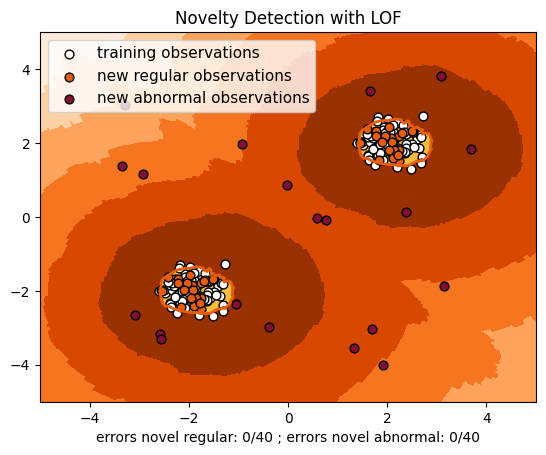

In [38]:
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Set the seed for reproducibility
np.random.seed(91)

# Define custom colors
background_contourf_color = '#FABC3F'  # Color for the decision boundary contourf
decision_boundary_color = '#E85C0D'    # Color for the decision boundary contour
contour_fill_color = '#C7253E'         # Color for the contour fill (beyond boundary)
outlier_color = '#821131'              # Color for outliers
regular_color = '#E85C0D'             # Color for new regular observations (same as boundary for consistency)

# Generate data
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Fit the model for novelty detection (novelty=True)
clf = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
clf.fit(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# Plot
plt.title("Novelty Detection with LOF")
# Plot decision function as a contour plot
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Contourf for decision boundary
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('Oranges')).cmap)
# Contour line for decision boundary
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors=decision_boundary_color)
# Contourf for the area beyond decision boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors=background_contourf_color)

# Plot points
s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k", label="training observations")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c=regular_color, s=s, edgecolors="k", label="new regular observations")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=outlier_color, s=s, edgecolors="k", label="new abnormal observations")

plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(loc="upper left", prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_test, n_error_outliers)
)
plt.show()


In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())

In [40]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

'linear'

In [41]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

In [42]:
import numpy as np
from sklearn import svm
def my_kernel(X, Y):
    return np.dot(X, Y.T)

clf = svm.SVC(kernel=my_kernel)

In [43]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
X, y = make_classification(n_samples=300, random_state=91)
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=91)
clf = svm.SVC(kernel='precomputed')
# linear kernel computation
gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, y_train)

SVC(kernel='precomputed')

In [44]:
gram_test = np.dot(X_test, X_train.T)
clf.predict(gram_test)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0])

## **2.0 Decision Tree Regression**

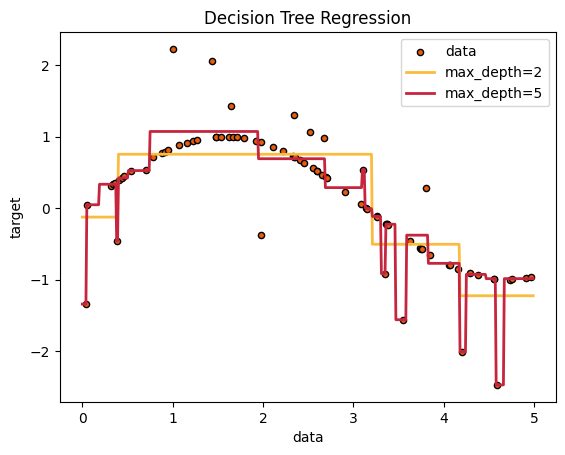

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.colors as mcolors

# Define custom colors
colors = ["#FABC3F", "#E85C0D", "#C7253E", "#821131"]
data_color = colors[1]  # Color for the scatter plot
line_colors = [colors[0], colors[2]]  # Colors for the regression lines

# Create a random dataset
rng = np.random.RandomState(91)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression models
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c=data_color, label="data")
plt.plot(X_test, y_1, color=line_colors[0], label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color=line_colors[1], label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# **3.0 Kernel PCA**

In [46]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=300, factor=0.3, noise=0.05, random_state=91)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=91)

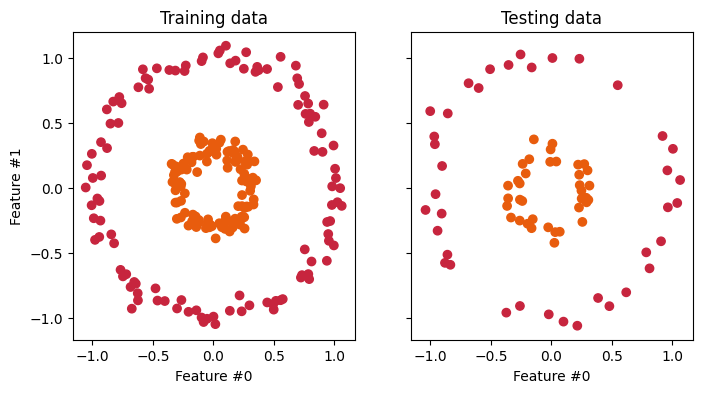

In [47]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define custom colors
colors = ["#C7253E", "#E85C0D","#FABC3F", "#821131"]
scatter_cmap = mcolors.ListedColormap(colors[:2])  # Use the first two colors for binary classification

# Plot the results
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=scatter_cmap)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=scatter_cmap)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing data")

plt.show()


In [48]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

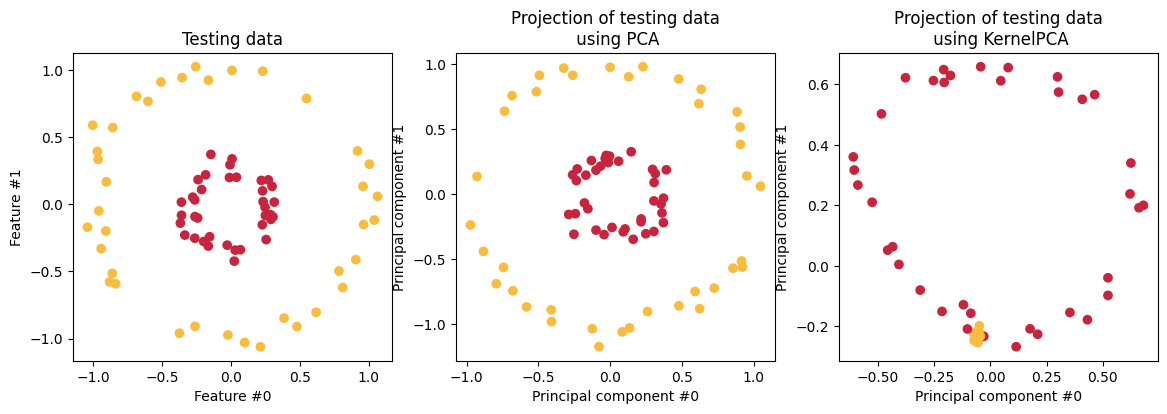

In [49]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define custom colors
colors = ["#FABC3F", "#C7253E", "#E85C0D", "#821131"]
scatter_cmap = mcolors.ListedColormap(colors[:2])  # Use the first two colors for binary classification

# Create subplots
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

# Plot original data
orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=scatter_cmap)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

# Plot PCA projection
pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=scatter_cmap)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

# Plot Kernel PCA projection
kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test, cmap=scatter_cmap)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

plt.show()

In [50]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

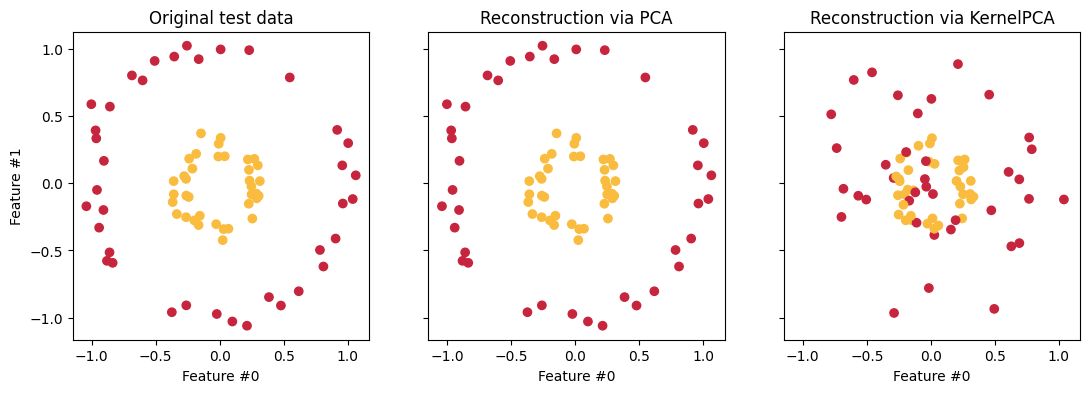

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define custom colors
colors = ["#C7253E","#FABC3F", "#E85C0D", "#821131"]
scatter_cmap = mcolors.ListedColormap(colors[:2])  # Use the first two colors for binary classification

# Create subplots
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

# Plot original test data
orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=scatter_cmap)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

# Plot reconstruction via PCA
pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test, cmap=scatter_cmap)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

# Plot reconstruction via Kernel PCA
kernel_pca_back_proj_ax.scatter(X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test, cmap=scatter_cmap)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

plt.show()


# **4.0 Model Selection**

In [52]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [53]:
#Sample Size set to 300 (Group 6)
X, y = make_hastie_10_2(n_samples=300, random_state=91)

# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=91),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)
gs.fit(X, y)
results = gs.cv_results_

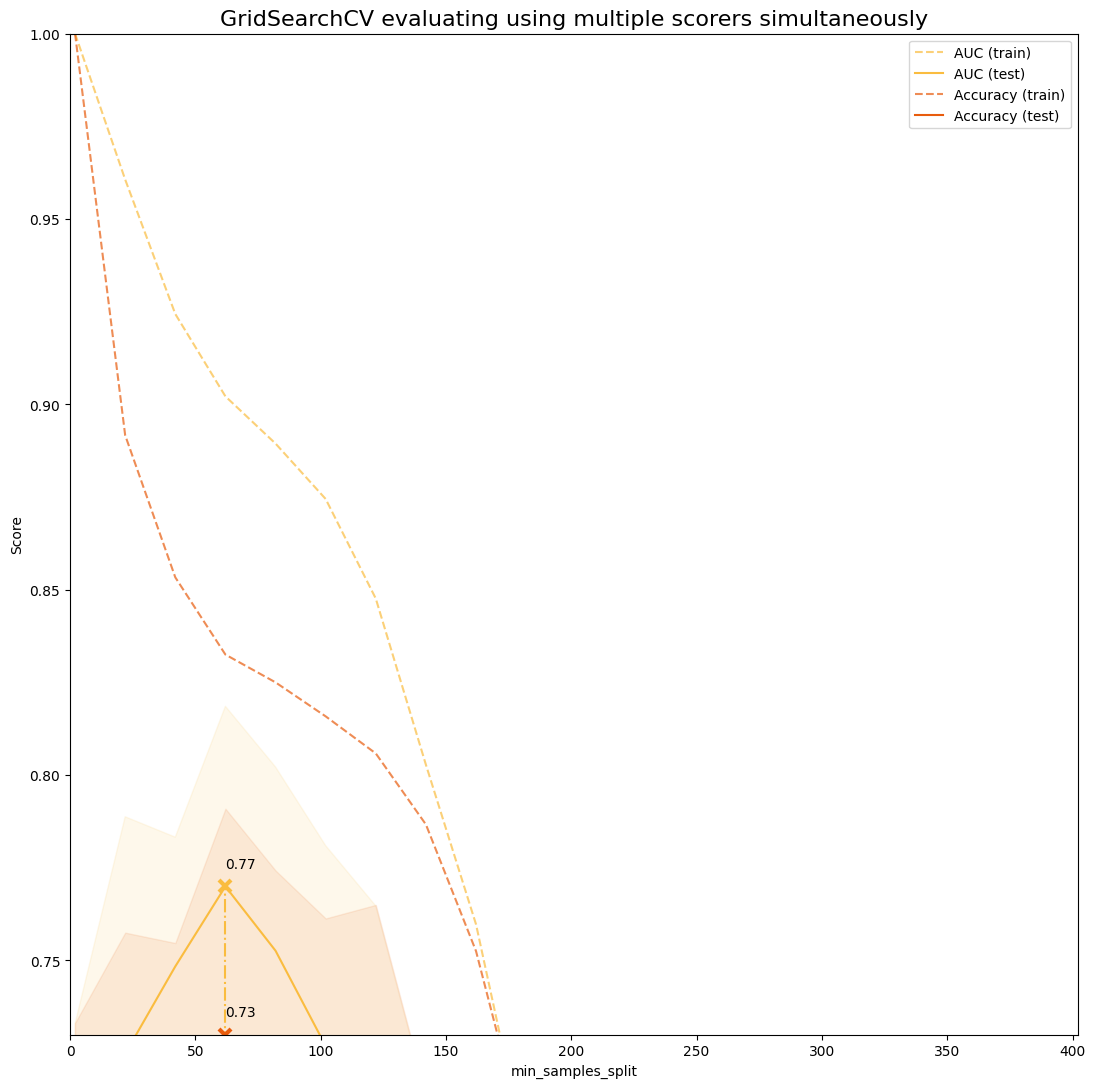

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Define custom colors
colors = ["#FABC3F", "#E85C0D"]  # Use the first two colors for different scorers

plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)

# Plot data using the custom color palette
for scorer, color in zip(sorted(scoring), colors):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [55]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [56]:
X, y = make_hastie_10_2(n_samples=300, random_state=91)

# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=91),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)
gs.fit(X, y)
results = gs.cv_results_

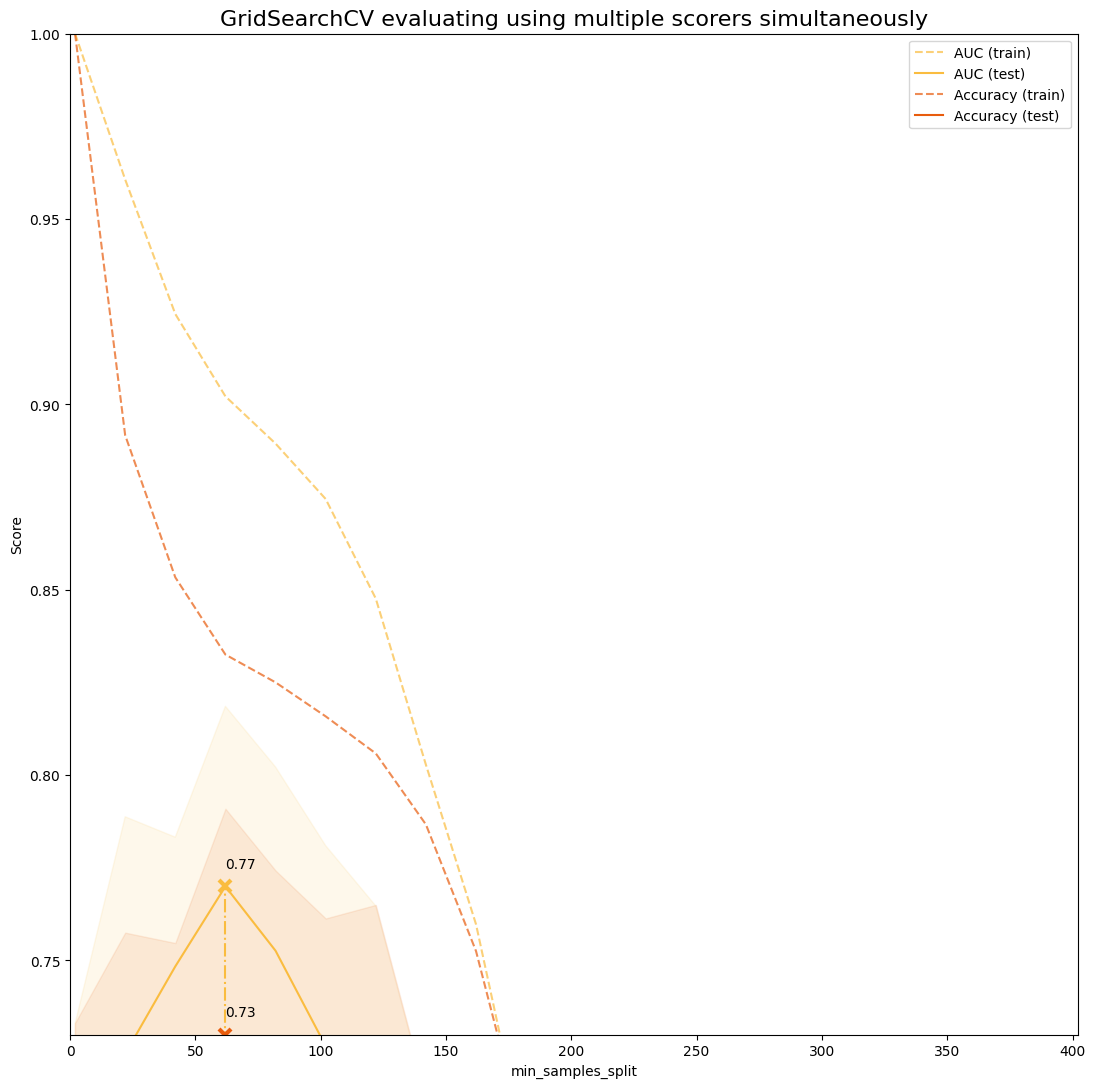

In [57]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)

for scorer, color in zip(sorted(scoring), ["#FABC3F", "#E85C0D"]):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

# **5.0 Preprocessing Data**

In [58]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [59]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [60]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [61]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [62]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [63]:
X_scaled.std(axis=0)

array([1., 1., 1.])

In [64]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=91)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=91)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [65]:
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.88

In [66]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [67]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [68]:
min_max_scaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [69]:
min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

In [70]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [71]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

In [72]:
max_abs_scaler.scale_

array([2., 1., 2.])

In [73]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=91)
quantile_transformer = preprocessing.QuantileTransformer(random_state=91)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


array([4.3, 5.1, 5.8, 6.4, 7.9])

In [74]:
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])

array([0.        , 0.23873874, 0.50900901, 0.75675676, 1.        ])

In [75]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

array([4.4  , 5.1  , 5.75 , 6.475, 7.7  ])

In [76]:
np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])

array([0.01351351, 0.23873874, 0.47972973, 0.78716216, 0.98648649])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (500) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (500) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (500) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (500) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (500) is greater than the total number of samples (150). n_qua

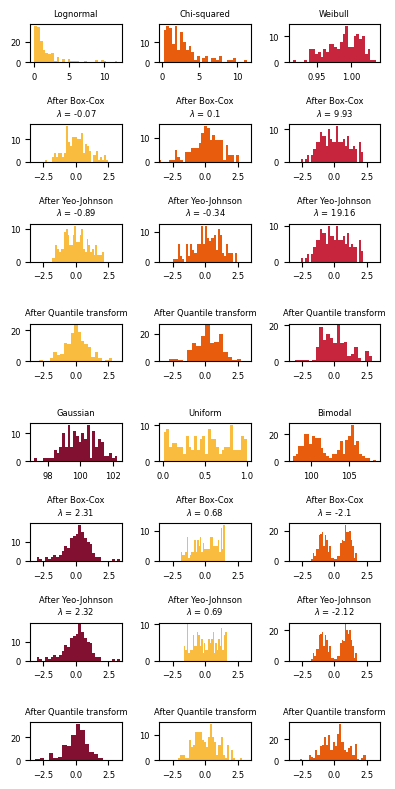

In [77]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

N_SAMPLES = 300
FONT_SIZE = 6
BINS = 30


rng = np.random.RandomState(91)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

colors = ["#FABC3F", "#E85C0D", "#C7253E", "#821131","#FABC3F", "#E85C0D"]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

In [78]:
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=91)
X_trans = quantile_transformer.fit_transform(X)
quantile_transformer.quantiles_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (600). n_quantiles is set to n_samples.
  warnings.warn(


array([[ 97.56586177],
       [ 97.68308121],
       [ 97.71289817],
       [ 97.82314768],
       [ 97.84686347],
       [ 97.97349564],
       [ 97.99188792],
       [ 98.11324808],
       [ 98.11745341],
       [ 98.16232734],
       [ 98.20721358],
       [ 98.23379482],
       [ 98.24681872],
       [ 98.24892889],
       [ 98.25944476],
       [ 98.32216364],
       [ 98.33169381],
       [ 98.33779804],
       [ 98.33952044],
       [ 98.35948702],
       [ 98.37133165],
       [ 98.41383859],
       [ 98.44769904],
       [ 98.50442959],
       [ 98.54775115],
       [ 98.58407637],
       [ 98.60507438],
       [ 98.62704975],
       [ 98.63604576],
       [ 98.67329073],
       [ 98.68685182],
       [ 98.69167509],
       [ 98.7020996 ],
       [ 98.73977096],
       [ 98.74780607],
       [ 98.77313056],
       [ 98.78079136],
       [ 98.7907172 ],
       [ 98.80527035],
       [ 98.80627631],
       [ 98.81877919],
       [ 98.86739328],
       [ 98.8724229 ],
       [ 98

In [79]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [80]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer()

In [81]:
normalizer.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [82]:
normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

In [83]:
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OrdinalEncoder()

In [84]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [85]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [86]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
enc = Pipeline(steps=[
    ("encoder", preprocessing.OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy="constant", fill_value=-1)),
])
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [88]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder()

In [89]:
enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [90]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [91]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])

In [92]:
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder(categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']])

In [93]:
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

In [94]:
enc = preprocessing.OneHotEncoder(handle_unknown='infrequent_if_exist')
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder(handle_unknown='infrequent_if_exist')

In [95]:
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 0., 0., 0.]])

In [96]:
X = [['male', 'from US', 'uses Safari'],
     ['female', 'from Europe', 'uses Firefox']]
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
drop_enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [97]:
drop_enc.transform(X).toarray()

array([[1., 1., 1.],
       [0., 0., 0.]])

In [98]:
drop_enc = preprocessing.OneHotEncoder(drop='if_binary', sparse_output=False,
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
X_trans = drop_enc.transform(X_test)
X_trans

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0.]])

In [99]:
drop_enc.inverse_transform(X_trans)

array([['female', 'from Europe', 'uses Firefox']], dtype=object)

In [100]:
X = np.array([['dog'] * 5 + ['cat'] * 20 + ['rabbit'] * 10 +
              ['snake'] * 3], dtype=object).T
enc = preprocessing.OrdinalEncoder(min_frequency=6).fit(X)
enc.infrequent_categories_

[array(['dog', 'snake'], dtype=object)]

In [101]:
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[2.],
       [0.],
       [1.],
       [2.]])

In [102]:
X_train = np.array(
    [["a"] * 5 + ["b"] * 20 + ["c"] * 10 + ["d"] * 3 + [np.nan]],
    dtype=object).T
enc = preprocessing.OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=3,
    max_categories=3, encoded_missing_value=4)
_ = enc.fit(X_train)
X_test = np.array([["a"], ["b"], ["c"], ["d"], ["e"], [np.nan]], dtype=object)
enc.transform(X_test)

array([[2.],
       [0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [103]:
enc = preprocessing.OneHotEncoder(min_frequency=6, sparse_output=False).fit(X)
enc.infrequent_categories_

[array(['dog', 'snake'], dtype=object)]

In [104]:
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [105]:
enc = preprocessing.OneHotEncoder(
   handle_unknown='infrequent_if_exist', sparse_output=False, min_frequency=6)
enc = enc.fit(X)
enc.transform(np.array([['dragon']]))

array([[0., 0., 1.]])

In [106]:
enc.get_feature_names_out()

array(['x0_cat', 'x0_rabbit', 'x0_infrequent_sklearn'], dtype=object)

In [107]:
enc = preprocessing.OneHotEncoder(max_categories=2, sparse_output=False)
enc = enc.fit(X)
enc.transform([['dog'], ['cat'], ['rabbit'], ['snake']])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [108]:
enc = preprocessing.OneHotEncoder(min_frequency=4, max_categories=3, sparse_output=False)
enc = enc.fit(X)
enc.transform([['dog'], ['cat'], ['rabbit'], ['snake']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [109]:
X = np.asarray([["a"] * 20 + ["b"] * 10 + ["c"] * 10 + ["d"] * 10], dtype=object).T
enc = preprocessing.OneHotEncoder(max_categories=3).fit(X)
enc.infrequent_categories_

[array(['b', 'c'], dtype=object)]

In [110]:
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)

In [111]:
est.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [112]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
bins = [0, 1, 13, 20, 60, np.inf]
labels = ['infant', 'kid', 'teen', 'adult', 'senior citizen']
transformer = preprocessing.FunctionTransformer(
    pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
)
X = np.array([0.2, 2, 15, 25, 97])
transformer.fit_transform(X)

['infant', 'kid', 'teen', 'adult', 'senior citizen']
Categories (5, object): ['infant' < 'kid' < 'teen' < 'adult' < 'senior citizen']

In [113]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

Binarizer()

In [114]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [115]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [116]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [117]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [118]:
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [119]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])

In [120]:
import numpy as np
from sklearn.preprocessing import SplineTransformer
X = np.arange(5).reshape(5, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [121]:
spline = SplineTransformer(degree=2, n_knots=3)
spline.fit_transform(X)

array([[0.5  , 0.5  , 0.   , 0.   ],
       [0.125, 0.75 , 0.125, 0.   ],
       [0.   , 0.5  , 0.5  , 0.   ],
       [0.   , 0.125, 0.75 , 0.125],
       [0.   , 0.   , 0.5  , 0.5  ]])

In [122]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X = np.array([[0, 1], [2, 3]])
# Since FunctionTransformer is no-op during fit, we can call transform directly
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [123]:
import warnings
warnings.filterwarnings("error", message=".*check_inverse*.",
                        category=UserWarning, append=False)

### **CODE REPLICATION CUTOFF**

# **6. Modification of Preprocessing**



In [124]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
X_train = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [125]:
scaler.mean_

array([200.5     , 316.8075  , 107.41    ,   3.0875  ,   3.4     ,
         3.4525  ,   8.598925,   0.5475  ,   0.72435 ])

In [126]:
scaler.scale_

array([115.46969299,  11.45929508,   6.06192214,   1.14229758,
         1.00560927,   0.89735375,   0.59557123,   0.49773864,
         0.14243096])

In [127]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[-1.72772608,  1.76210664,  1.74697064, ...,  1.76481828,
         0.90911166,  1.37364801],
       [-1.7190658 ,  0.62765641, -0.06763531, ...,  0.45515126,
         0.90911166,  0.25029671],
       [-1.71040552, -0.07046681, -0.56252785, ..., -1.00563118,
         0.90911166, -0.03054111],
       ...,
       [ 1.71040552,  1.15124883,  1.41704229, ...,  1.42900622,
         0.90911166,  1.30343855],
       [ 1.7190658 , -0.41952842, -0.72749202, ...,  0.30403584,
        -1.09997489, -0.38158839],
       [ 1.72772608,  1.41304503,  1.58200646, ...,  1.78160888,
         0.90911166,  1.58427637]])

In [128]:
X_scaled.mean(axis=0)

array([ 7.10542736e-17, -4.17443857e-16,  5.59552404e-16,  7.10542736e-17,
        7.99360578e-17, -1.33226763e-16,  7.77156117e-16, -3.99680289e-17,
       -3.37507799e-16])

In [129]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [130]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=91)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=91)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [131]:
pipe.score(X_test, y_test)

0.88

In [132]:
import pandas as pd
X_train = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.        , 0.94      , 0.92857143, ..., 0.91346154, 1.        ,
        0.92063492],
       [0.00250627, 0.68      , 0.53571429, ..., 0.66346154, 1.        ,
        0.66666667],
       [0.00501253, 0.52      , 0.42857143, ..., 0.38461538, 1.        ,
        0.6031746 ],
       ...,
       [0.99498747, 0.8       , 0.85714286, ..., 0.84935897, 1.        ,
        0.9047619 ],
       [0.99749373, 0.44      , 0.39285714, ..., 0.63461538, 0.        ,
        0.52380952],
       [1.        , 0.86      , 0.89285714, ..., 0.91666667, 1.        ,
        0.96825397]])

In [133]:
X_test = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[0.        , 0.94      , 0.92857143, ..., 0.91346154, 1.        ,
        0.92063492],
       [0.00250627, 0.68      , 0.53571429, ..., 0.66346154, 1.        ,
        0.66666667],
       [0.00501253, 0.52      , 0.42857143, ..., 0.38461538, 1.        ,
        0.6031746 ],
       ...,
       [0.99498747, 0.8       , 0.85714286, ..., 0.84935897, 1.        ,
        0.9047619 ],
       [0.99749373, 0.44      , 0.39285714, ..., 0.63461538, 0.        ,
        0.52380952],
       [1.        , 0.86      , 0.89285714, ..., 0.91666667, 1.        ,
        0.96825397]])

In [134]:
min_max_scaler.scale_

array([0.00250627, 0.02      , 0.03571429, 0.25      , 0.25      ,
       0.25      , 0.32051282, 1.        , 1.58730159])

In [135]:
min_max_scaler.min_

array([-2.50626566e-03, -5.80000000e+00, -3.28571429e+00, -2.50000000e-01,
       -2.50000000e-01, -2.50000000e-01, -2.17948718e+00,  0.00000000e+00,
       -5.39682540e-01])

In [136]:
X_train = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[0.0025    , 0.99117647, 0.98333333, ..., 0.97278226, 1.        ,
        0.94845361],
       [0.005     , 0.95294118, 0.89166667, ..., 0.89415323, 1.        ,
        0.78350515],
       [0.0075    , 0.92941176, 0.86666667, ..., 0.80645161, 1.        ,
        0.74226804],
       ...,
       [0.995     , 0.97058824, 0.96666667, ..., 0.95262097, 1.        ,
        0.93814433],
       [0.9975    , 0.91764706, 0.85833333, ..., 0.88508065, 0.        ,
        0.69072165],
       [1.        , 0.97941176, 0.975     , ..., 0.97379032, 1.        ,
        0.97938144]])

In [137]:
max_abs_scaler.scale_

array([400.  , 340.  , 120.  ,   5.  ,   5.  ,   5.  ,   9.92,   1.  ,
         0.97])

In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")

# Drop rows with missing values or fill them
df = df.dropna()  # Or use df.fillna() to impute missing values

# Ensure all features are numerical
X = df.drop(columns="Chance of Admit ")
y = df["Chance of Admit "]

# Convert to numerical if needed
X = X.select_dtypes(include=[np.number])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=91)

# Initialize and apply the QuantileTransformer
quantile_transformer = QuantileTransformer(random_state=91)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
# Print percentiles for the first feature of the transformed training data
print(np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (300). n_quantiles is set to n_samples.
  warnings.warn(


In [139]:
np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])

array([0.00780379, 0.25229933, 0.4632107 , 0.76240245, 0.9916388 ])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (500) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (500) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (500) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (500) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (500) is greater than the total number of samples (150). n_qua

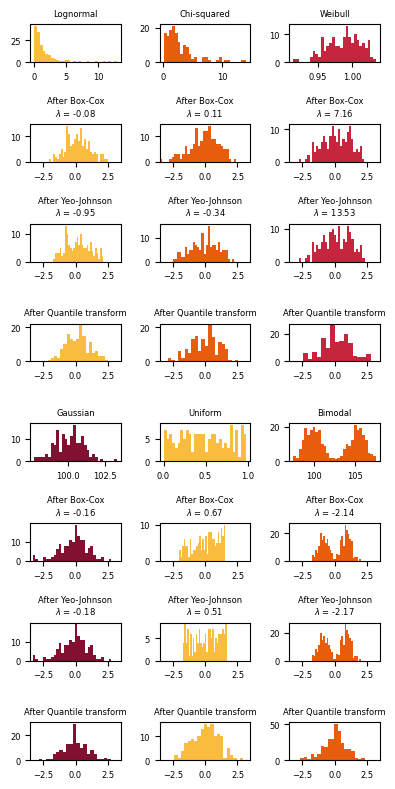

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

# Configuration
N_SAMPLES = 300
FONT_SIZE = 6
BINS = 30

# Initialize transformers
rng = np.random.RandomState(91)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
qt = QuantileTransformer(n_quantiles=500, output_distribution="normal", random_state=rng)

# Loading the custom dataset
df = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")

# Modify the column names and number of columns as needed
columns_to_analyze = ['GRE Score', 'TOEFL Score', 'University Rating']
X_custom = df[columns_to_analyze].values

# Synthetic Data
size = (N_SAMPLES, 1)

X_lognormal = rng.lognormal(size=size)
X_chisq = rng.chisquare(df=3, size=size)
X_weibull = rng.weibull(a=50, size=size)
X_gaussian = rng.normal(loc=100, size=size)
X_uniform = rng.uniform(low=0, high=1, size=size)
X_a = rng.normal(loc=100, size=size)
X_b = rng.normal(loc=105, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)

# Combine synthetic data and custom data
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
    ("GRE Score", X_custom[:, 0]),
    ("TOEFL Score", X_custom[:, 1]),
    ("University Rating", X_custom[:, 2])
]

colors = [
    "#FABC3F", "#E85C0D", "#C7253E", "#821131", "#FABC3F", "#E85C0D",
    "#C7253E", "#821131", "#FABC3F"
]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]

for (name, data), color, axes in zip(distributions, colors, axes_list):
    X_train, X_test = train_test_split(data, test_size=0.5, random_state=91)

    # Perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train.reshape(-1, 1)).transform(X_test.reshape(-1, 1))
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train.reshape(-1, 1)).transform(X_test.reshape(-1, 1))
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train.reshape(-1, 1)).transform(X_test.reshape(-1, 1))

    ax_original, ax_bc, ax_yj, ax_qt = axes

    # Plot original data
    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    # Plot transformed data
    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])

plt.tight_layout()
plt.show()


In [141]:
from sklearn import preprocessing
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=91)
X_trans = quantile_transformer.fit_transform(X)
quantile_transformer.quantiles_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (400). n_quantiles is set to n_samples.
  warnings.warn(


array([[  1.  , 290.  ,  92.  , ...,   1.  ,   6.8 ,   0.  ],
       [  2.  , 290.  ,  93.  , ...,   1.5 ,   7.2 ,   0.  ],
       [  3.  , 293.  ,  93.  , ...,   1.5 ,   7.25,   0.  ],
       ...,
       [398.  , 340.  , 120.  , ...,   5.  ,   9.87,   1.  ],
       [399.  , 340.  , 120.  , ...,   5.  ,   9.91,   1.  ],
       [400.  , 340.  , 120.  , ...,   5.  ,   9.92,   1.  ]])

In [142]:
X = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[0.00279896, 0.94325084, 0.33027774, ..., 0.02701   , 0.00279896,
        0.00257505],
       [0.00585804, 0.94900268, 0.31340521, ..., 0.02598041, 0.00292902,
        0.00222606],
       [0.00901357, 0.94942953, 0.31247048, ..., 0.02403619, 0.00300452,
        0.00216326],
       ...,
       [0.75092685, 0.62262779, 0.2188631 , ..., 0.0178298 , 0.00188675,
        0.00171694],
       [0.77178934, 0.60350444, 0.19923384, ..., 0.01698323, 0.        ,
        0.00129599],
       [0.74962353, 0.62406159, 0.21926488, ..., 0.01810341, 0.00187406,
        0.00178036]])

In [143]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer.transform(X)

array([[0.00279896, 0.94325084, 0.33027774, ..., 0.02701   , 0.00279896,
        0.00257505],
       [0.00585804, 0.94900268, 0.31340521, ..., 0.02598041, 0.00292902,
        0.00222606],
       [0.00901357, 0.94942953, 0.31247048, ..., 0.02403619, 0.00300452,
        0.00216326],
       ...,
       [0.75092685, 0.62262779, 0.2188631 , ..., 0.0178298 , 0.00188675,
        0.00171694],
       [0.77178934, 0.60350444, 0.19923384, ..., 0.01698323, 0.        ,
        0.00129599],
       [0.74962353, 0.62406159, 0.21926488, ..., 0.01810341, 0.00187406,
        0.00178036]])

In [144]:
enc = preprocessing.OrdinalEncoder()
X = [['Magna Cum Laude', '3.6', 'Jose Rizal Honors Society'], ['Summa Cum Laude', '3.8', 'Outstanding Thesis Award'], ['Cum Laude', '3.4', 'Dean Lister']]
enc.fit(X)
enc.transform([['Magna Cum Laude', '3.8', 'Outstanding Thesis Award']])

array([[1., 2., 2.]])

In [145]:
enc = preprocessing.OrdinalEncoder()
X = [['Magna Cum Laude'], ['Summa Cum Laude'], [np.nan], ['Cum Laude']]
enc.fit_transform(X)

array([[ 1.],
       [ 2.],
       [nan],
       [ 0.]])

In [146]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['Magna Cum Laude'], ['Summa Cum Laude'], [np.nan], ['Cum Laude']]
enc.fit_transform(X)

array([[ 1.],
       [ 2.],
       [-1.],
       [ 0.]])

In [147]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
enc = Pipeline(steps=[
    ("encoder", preprocessing.OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy="constant", fill_value=-1)),
])
enc.fit_transform(X)

array([[ 1.],
       [ 2.],
       [-1.],
       [ 0.]])

In [148]:
enc = preprocessing.OneHotEncoder()
X = [['Magna Cum Laude', '3.6', 'Jose Rizal Honors Society'], ['Summa Cum Laude', '3.8', 'Outstanding Thesis Award'], ['Cum Laude', '3.4', 'Dean Lister']]
enc.fit(X)
enc.transform([['Magna Cum Laude', '3.4', 'Outstanding Thesis Award'],
               ['Cum Laude', '3.8', 'Jose Rizal Honors Society']]).toarray()

array([[0., 1., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0.]])

In [149]:
enc.categories_

[array(['Cum Laude', 'Magna Cum Laude', 'Summa Cum Laude'], dtype=object),
 array(['3.4', '3.6', '3.8'], dtype=object),
 array(['Dean Lister', 'Jose Rizal Honors Society',
        'Outstanding Thesis Award'], dtype=object)]

In [150]:
gpa = ['3.4', '3.6','3.8']
honor = ['Cum Laude', 'Magna Cum Laude', 'Summa Cum Laude']
award = ['Jose Rizal Honors Society', 'Outstanding Thesis Award', 'Dean Lister']
enc = preprocessing.OneHotEncoder(categories=[gpa, honor, award])
# Note that for there are missing categorical values for the 2nd and 3rd
# feature
X = [['3.4', 'Cum Laude', 'Dean Lister'], ['3.6', 'Summa Cum Laude', 'Outstanding Thesis Award']]
enc.fit(X)
enc.transform([['3.6', 'Magna Cum Laude', 'Outstanding Thesis Award']]).toarray()

array([[0., 1., 0., 0., 1., 0., 0., 1., 0.]])

In [151]:
X = [['Magna Cum Laude', '3.4', 'Outstanding Thesis Award'],
      ['Cum Laude', '3.8', 'Jose Rizal Honors Society']]
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
drop_enc.categories_
drop_enc.transform(X).toarray()

array([[1., 0., 1.],
       [0., 1., 0.]])

In [152]:
X = [['Magna Cum Laude', '3.4', 'Outstanding Thesis Award'],
      ['Cum Laude', '3.8', 'Jose Rizal Honors Society'],
      ['Summa Cum Laude', '3.6', 'Dean Lister']]
drop_enc = preprocessing.OneHotEncoder(drop='if_binary').fit(X)
drop_enc.categories_
drop_enc.transform(X).toarray()

array([[0., 1., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0.]])

In [153]:
drop_enc = preprocessing.OneHotEncoder(drop='first',
                                       handle_unknown='ignore').fit(X)
X_test = [['Honorable Mention', '3.0', 'Second Honors']]
drop_enc.transform(X_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., 0., 0., 0.]])

In [154]:
drop_enc = preprocessing.OneHotEncoder(drop='if_binary', sparse_output=False,
                                       handle_unknown='ignore').fit(X)
X_test = [['Honorable Mention', '3.0', 'Second Honors']]
X_trans = drop_enc.transform(X_test)
X_trans
drop_enc.inverse_transform(X_trans)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[None, None, None]], dtype=object)

In [155]:
X = np.array([['Dachshund'] * 5 + ['Yorkie'] * 20 + ['Shih Tzu'] * 10 +
              ['Aspin'] * 3], dtype=object).T
enc = preprocessing.OrdinalEncoder(min_frequency=6).fit(X)
enc.infrequent_categories_
enc.transform(np.array([['Dachshund'], ['Yorkie'], ['Shih Tzu'], ['Aspin']]))

array([[2.],
       [1.],
       [0.],
       [2.]])

In [156]:
X_train = np.array(
    [["1"] * 5 + ["2"] * 20 + ["3"] * 10 + ["4"] * 3 + [np.nan]],
    dtype=object).T
enc = preprocessing.OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=3,
    max_categories=3, encoded_missing_value=4)
_ = enc.fit(X_train)
X_test = np.array([["1"], ["2"], ["3"], ["4"], ["5"], [np.nan]], dtype=object)
enc.transform(X_test)

array([[2.],
       [0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [157]:
enc = preprocessing.OneHotEncoder(min_frequency=6, sparse_output=False).fit(X)
enc.infrequent_categories_
enc.transform(np.array([['Dachshund'], ['Yorkie'], ['Shih Tzu'], ['Aspin']]))

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [158]:
enc = preprocessing.OneHotEncoder(
   handle_unknown='infrequent_if_exist', sparse_output=False, min_frequency=6)
enc = enc.fit(X)
enc.transform(np.array([['Elden Ring']]))

array([[0., 0., 1.]])

In [159]:
enc.get_feature_names_out()

array(['x0_Shih Tzu', 'x0_Yorkie', 'x0_infrequent_sklearn'], dtype=object)

In [160]:
enc = preprocessing.OneHotEncoder(max_categories=2, sparse_output=False)
enc = enc.fit(X)
enc.transform([['Dachshund'], ['Yorkie'], ['Shih Tzu'], ['Aspin']])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [161]:
enc = preprocessing.OneHotEncoder(min_frequency=4, max_categories=3, sparse_output=False)
enc = enc.fit(X)
enc.transform([['Dachshund'], ['Yorkie'], ['Shih Tzu'], ['Aspin']])

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [162]:
X = np.asarray([["1"] * 20 + ["2"] * 10 + ["3"] * 10 + ["4"] * 10], dtype=object).T
enc = preprocessing.OneHotEncoder(max_categories=3).fit(X)
enc.infrequent_categories_

[array(['2', '3'], dtype=object)]

In [163]:
X = np.array([[ 1., 2., 3 ],
              [  4., 5., 6 ],
              [  7., 8., 9 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[2, 2, 3], encode='ordinal').fit(X)

In [164]:
est.transform(X)

array([[0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 2.]])

In [165]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
bins = [0, 1, 2, 3, 4, np.inf]
labels = ['zero', 'one', 'two', 'three', 'four']
transformer = preprocessing.FunctionTransformer(
    pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
)
X = np.array([0.2, 2, 15, 25, 97])
transformer.fit_transform(X)

['zero', 'one', 'four', 'four', 'four']
Categories (5, object): ['zero' < 'one' < 'two' < 'three' < 'four']

In [166]:
X = [[ 1., 2.,  3.],
     [ 4.,  5.,  6.],
     [ 7.,  8., 9.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer

binarizer.transform(X)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [167]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [168]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")
X
poly = PolynomialFeatures(4)
poly.fit_transform(X)

array([[1.0000000e+00, 1.0000000e+00, 3.3700000e+02, ..., 8.4640000e-01,
        7.7868800e-01, 7.1639296e-01],
       [1.0000000e+00, 2.0000000e+00, 3.2400000e+02, ..., 5.7760000e-01,
        4.3897600e-01, 3.3362176e-01],
       [1.0000000e+00, 3.0000000e+00, 3.1600000e+02, ..., 5.1840000e-01,
        3.7324800e-01, 2.6873856e-01],
       ...,
       [1.0000000e+00, 3.9800000e+02, 3.3000000e+02, ..., 8.2810000e-01,
        7.5357100e-01, 6.8574961e-01],
       [1.0000000e+00, 3.9900000e+02, 3.1200000e+02, ..., 0.0000000e+00,
        0.0000000e+00, 2.0151121e-01],
       [1.0000000e+00, 4.0000000e+02, 3.3300000e+02, ..., 9.0250000e-01,
        8.5737500e-01, 8.1450625e-01]])

In [169]:
X = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")
X
poly = PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(X)

array([[  1.     ,   1.     , 337.     , ...,  39.951  ,   4.14   ,
          8.878  ],
       [  1.     ,   2.     , 324.     , ...,  30.3354 ,   3.42   ,
          6.7412 ],
       [  1.     ,   3.     , 316.     , ...,  20.16   ,   2.52   ,
          5.76   ],
       ...,
       [  1.     , 398.     , 330.     , ...,  38.69775,   4.095  ,
          8.5995 ],
       [  1.     , 399.     , 312.     , ...,  23.5304 ,   0.     ,
          0.     ],
       [  1.     , 400.     , 333.     , ...,  36.708  ,   3.8    ,
          9.177  ]])

In [170]:
import numpy as np
from sklearn.preprocessing import SplineTransformer
X = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")
X
spline = SplineTransformer(degree=2, n_knots=3)
spline.fit_transform(X)

array([[5.00000000e-01, 5.00000000e-01, 0.00000000e+00, ...,
        1.25976316e-02, 6.33534895e-01, 3.53867473e-01],
       [4.95000031e-01, 5.04987406e-01, 1.25627352e-05, ...,
        2.22222222e-01, 7.22222222e-01, 5.55555556e-02],
       [4.90025188e-01, 5.09924561e-01, 5.02509406e-05, ...,
        3.14940791e-01, 6.63769211e-01, 2.12899975e-02],
       ...,
       [0.00000000e+00, 5.02509406e-05, 5.09924561e-01, ...,
        1.81405896e-02, 6.54195011e-01, 3.27664399e-01],
       [0.00000000e+00, 1.25627352e-05, 5.04987406e-01, ...,
        4.53514739e-01, 5.45351474e-01, 1.13378685e-03],
       [0.00000000e+00, 0.00000000e+00, 5.00000000e-01, ...,
        2.01562106e-03, 5.59460821e-01, 4.38523558e-01]])

In [171]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")
# Since FunctionTransformer is no-op during fit, we can call transform directly
transformer.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


array([[0.69314718, 5.8230459 , 4.77912349, ..., 2.36555989, 0.69314718,
        0.65232519],
       [1.09861229, 5.78382518, 4.68213123, ..., 2.28949985, 0.69314718,
        0.56531381],
       [1.38629436, 5.75890177, 4.65396035, ..., 2.19722458, 0.69314718,
        0.54232429],
       ...,
       [5.98896142, 5.80211838, 4.76217393, ..., 2.34660198, 0.69314718,
        0.64710324],
       [5.99146455, 5.74620319, 4.6443909 , ..., 2.28033948, 0.        ,
        0.51282363],
       [5.99396143, 5.81114099, 4.77068462, ..., 2.36649842, 0.69314718,
        0.66782937]])

In [172]:
import warnings
warnings.filterwarnings("error", message=".*check_inverse*.",
                        category=UserWarning, append=False)

# **7. Modification of Regression**



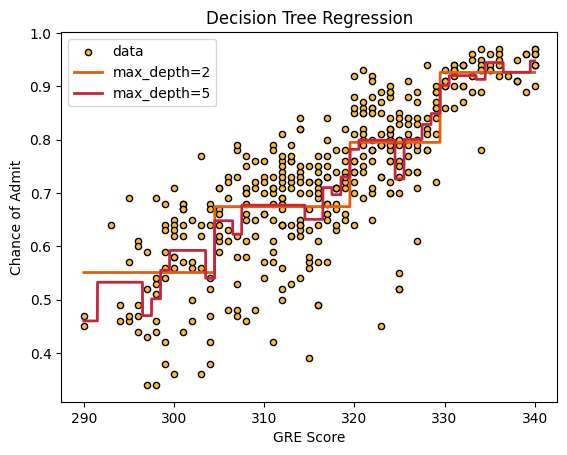

In [173]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/jcdatascience/DATA102/main/adm_data.csv")

# Prepare the data
X = df[['GRE Score']].values
y = df['Chance of Admit '].values

# Fit regression models
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]  # Generate test data within the range of X
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Colors
scatter_color = "#FABC3F"
line_color_1 = "#E85C0D"
line_color_2 = "#C7253E"

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c=scatter_color, label="data")
plt.plot(X_test, y_1, color=line_color_1, label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color=line_color_2, label="max_depth=5", linewidth=2)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()